In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
salary = pd.read_csv('../data/salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
salary.shape

(514, 11)

In [4]:
x_salary = salary.drop('salary', axis='columns')
x_salary.head()

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,0,0,0,1.17,1,0,1,1,3,0
1,1,0,0,1.24,1,0,1,1,2,0
2,0,0,0,1.21,1,0,1,1,3,2
3,0,2,1,0.99,1,0,1,1,4,1
4,0,2,2,0.91,1,0,1,1,4,1


In [5]:
y_salary = salary['salary']
y_salary.head()

0    53000.0
1    58000.0
2    45500.0
3    35782.0
4    34731.0
Name: salary, dtype: float64

In [6]:
x_salary_train, x_salary_test, y_salary_train, y_salary_test= train_test_split(x_salary,y_salary, test_size=0.20, random_state=33)

In [7]:
salary_train_df = pd.concat([y_salary_train,x_salary_train], axis = 1)


In [8]:
salary_train_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
215,54701.0,19,2,1,0.99,1,0,2,1,2,0
200,52172.0,6,15,11,0.73,1,0,3,1,4,0
106,65212.0,7,3,3,1.18,1,0,2,1,2,0
445,39660.0,0,9,4,0.74,0,0,2,0,3,24
38,37410.0,0,4,3,0.88,1,0,1,1,4,1


In [9]:
salary_train_df.dropna(inplace=True)

In [18]:
Q1_salary = salary_train_df['salary'].quantile(0.25)
Q3_salary = salary_train_df['salary'].quantile(0.75)
IQR_salary= Q3_salary - Q1_salary

Q1_yearsworked = salary_train_df['yearsworked'].quantile(0.25)
Q3_yearsworked = salary_train_df['yearsworked'].quantile(0.75)
IQR_yearsworked = Q3_yearsworked - Q1_yearsworked


In [20]:
salary_lower_limit = Q1_salary - 1.5*IQR_salary
salary_upper_limit = Q3_salary + 1.5*IQR_salary

yearsworked_lower_limit = Q1_salary - 1.5*IQR_salary
yearsworked_upper_limit = Q3_salary + 1.5*IQR_salary

salary_train_df = salary_train_df[((salary_train_df['salary']>salary_lower_limit)&(salary_train_df['salary']<salary_upper_limit))|((salary_train_df['yearsworked']>yearsworked_lower_limit)&(salary_train_df['yearsworked']<yearsworked_upper_limit))]

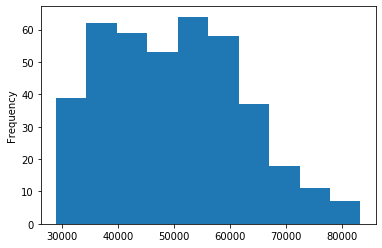

In [22]:
salary_train_df['salary'].plot.hist()

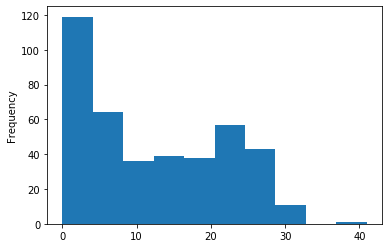

In [23]:
salary_train_df['yearsworked'].plot.hist()

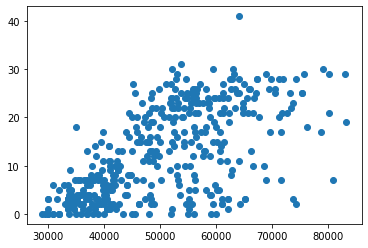

In [21]:
plt.scatter(salary_train_df['salary'],salary_train_df['yearsworked'])